In [138]:
import sys
from pathlib import Path
sys.path.append('../')

import numpy as np
import cv2
import json
from matplotlib import pyplot as plt

from gr.gr import find_stones, find_board
from gr.params import GrParams

filename = "../img/go_board_1"

def imshow(img):
    if len(img.shape) == 3:
        img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.axis('off')
        plt.imshow(img2)
    elif len(img.shape) == 2:
        plt.axis('off')
        plt.imshow(img, cmap='gray')


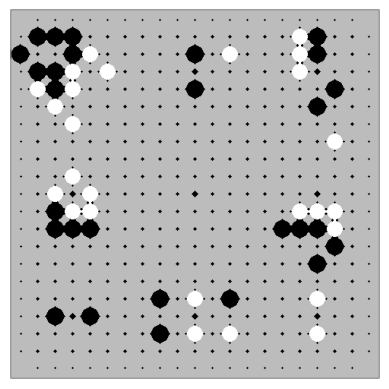

In [152]:
with open(filename + '.gpar') as f:
    p = json.load(f)
    params = GrParams()
    params.assign(p, copy_all=True)

img = cv2.imread(filename + '.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# gray = cv2.GaussianBlur( gray, (9, 9), 2, 2)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3, 3))
gray = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel, iterations=1)
gray = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel, iterations=1)
imshow(gray)

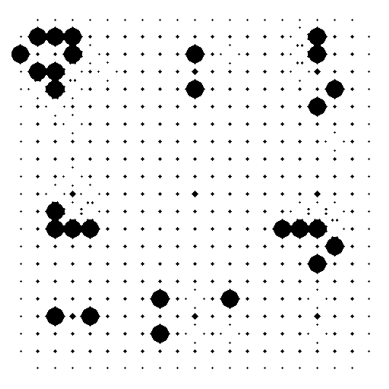

In [153]:
# thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
# thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=1)
# thresh = cv2.erode(thresh, kernel, iterations=3)
imshow(thresh)

28


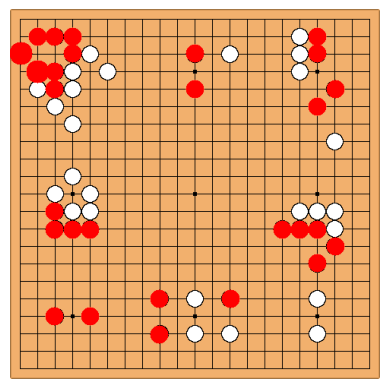

In [154]:
stones = cv2.HoughCircles(thresh, cv2.HOUGH_GRADIENT_ALT,
                                dp=1.5,
                                minDist = 10,
                                param1 = 100,
                                param2 = 0.2,
                                minRadius = 0,
                                maxRadius = 0)
canvas = img.copy()
stones = np.uint16(np.around(stones))
print(len(stones[0]))

for c in stones[0]:
    cv2.circle(canvas, c[:2], c[2], (0, 0, 255), -1)
imshow(canvas)